<a href="https://colab.research.google.com/github/JovianaYoung/2209116012_Joviana-Young_Mini-Project-1_Praktikum-WEB/blob/master/CAPSTONEDIGIPRODUCT_KELOMPOK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #  **PREDIKSI GAS CO2 EMISI KENDARAAN**

#**Import Library**

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import linecache
%matplotlib inline

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk meningkatkan akurasi prediksi emisi CO2 dengan mengembangkan model prediksi emisi CO2 yang lebih akurat berdasarkan data konsumsi bahan bakar dan untuk mengetahui jumlah emisi yang dihasilkan.

##**Assess Situation**

Situasi bisnis yang mendasari ini dikarenakan kendaraan roda empat, sebagai moda transportasi yang dominan di berbagai negara, berkontribusi besar terhadap emisi gas rumah kaca, terutama CO2. Hal ini menjadi landasan penting bagi pengembangan prediksi emisi CO2 yang akurat

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk dapat memprediksi Gas CO2 dari kendaraan roda empat berdasarkan konsumsi bahan bakar untuk menghitung jumlah emisi yang dihasilkan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset dimulai dengan mengumpulkan data terlebih dahulu. Selanjutnya, data akan diidentifikasi sesuai dengan kebutuhannya. Setelah itu, kualitas data juga akan dievaluasi, dan masalah data akan diatasi pada tahap selanjutnya. Tahap ini sangat penting untuk memastikan kesuksesan pada analisis data.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data berikut dari kaggle.
Berikut Linknya:
https://www.kaggle.com/datasets/sarita19/fuel-consumption/data

In [419]:
df = pd.read_csv('https://raw.githubusercontent.com/JovianaYoung/CAPSTONEDIGIPRODUCT_PDAB_KELOMPOK-1/main/FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


##**Describe Data**

####Informasi Dasar

In [420]:
df.shape

(1067, 13)

codingan diatas memiliki dimensi 1067 baris dan 13 kolom dalam dataset kami.

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


####Informasi Statistik Deskriptif

In [422]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


DataFrame kami mengandung data mobil dengan berbagai atribut dan emisi karbon dioksida (CO2). Berikut adalah deskripsi statistik singkat dari kolom-kolom dalam DataFrame:

MODELYEAR: Tahun model mobil, di mana semua nilai dalam kolom ini adalah 2014.
ENGINESIZE: Ukuran mesin mobil, dengan nilai rata-rata sekitar 3.35 dan nilai maksimum sebesar 8.4.
CYLINDERS: Jumlah silinder dalam mesin mobil, dengan nilai rata-rata sekitar 5.79 dan nilai maksimum sebesar 12.
FUELCONSUMPTION_CITY: Konsumsi bahan bakar di kota dalam liter per 100 kilometer, dengan nilai rata-rata sekitar 13.3 dan nilai maksimum sebesar 30.2.
FUELCONSUMPTION_HWY: Konsumsi bahan bakar di jalan raya dalam liter per 100 kilometer, dengan nilai rata-rata sekitar 9.47 dan nilai maksimum sebesar 20.5.
FUELCONSUMPTION_COMB: Konsumsi bahan bakar kombinasi dalam liter per 100 kilometer, dengan nilai rata-rata sekitar 11.58 dan nilai maksimum sebesar 25.8.
FUELCONSUMPTION_COMB_MPG: Konsumsi bahan bakar kombinasi dalam mil per galon (miles per gallon), dengan nilai rata-rata sekitar 26.44 dan nilai maksimum sebesar 60.
CO2EMISSIONS: Emisi CO2 dalam gram per kilometer, dengan nilai rata-rata sekitar 256.23 dan nilai maksimum sebesar 488.

##**Data Reduction**

###**Mengurangi Fitur Yang Kurang Relevan**

Dilakukan data reduction ditahapan awal karena ingin melanjutkan analisis data hanya dengan fitur-fitur yang mempengaruhi ke kolom fitur CO2 Emission

In [423]:
df = df.drop(['MODELYEAR','MAKE','MODEL','TRANSMISSION','VEHICLECLASS'], axis=1)

###**Pengecekkan Hasil**

In [424]:
df

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,3.0,6,X,13.4,9.8,11.8,24,271
1063,3.2,6,X,13.2,9.5,11.5,25,264
1064,3.0,6,X,13.4,9.8,11.8,24,271
1065,3.2,6,X,12.9,9.3,11.3,25,260


##**Exploratory Data Analysis**

In [425]:
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


codingan diatas membuat dataframe baru untuk melanjutkan analisis mendalam untuk memprediksi nilai CO2 Emissions.

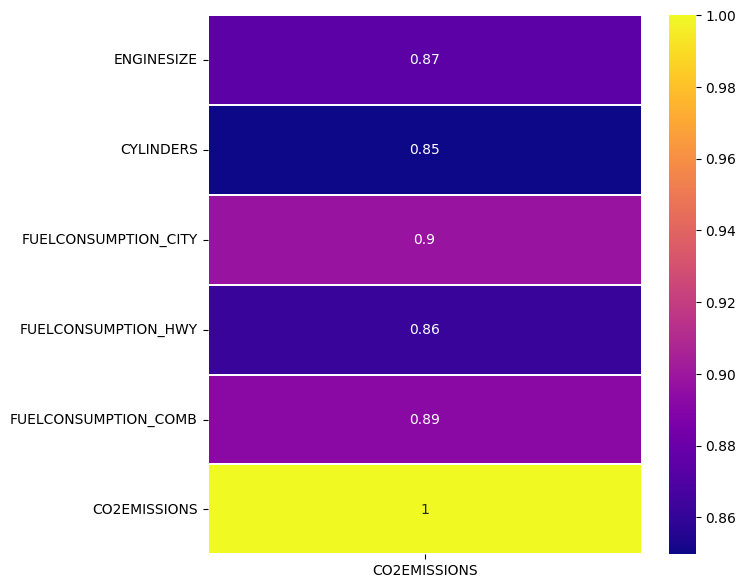

In [426]:

# Mengatur palet warna
sns.color_palette("YlOrBr", as_cmap=True)

# Membuat heatmap
# Membuat heatmap
fig = plt.figure(figsize=(7, 7))
sns.heatmap(new_df.corr()[['CO2EMISSIONS']], annot=True, linewidths=0.2, cmap="plasma")
plt.show()


Dari visualisasi ini lebih memperjelas hubungan korelasi yang mempengaruhi nilai fitur CO2EMISSION dengan fitur lainnya.

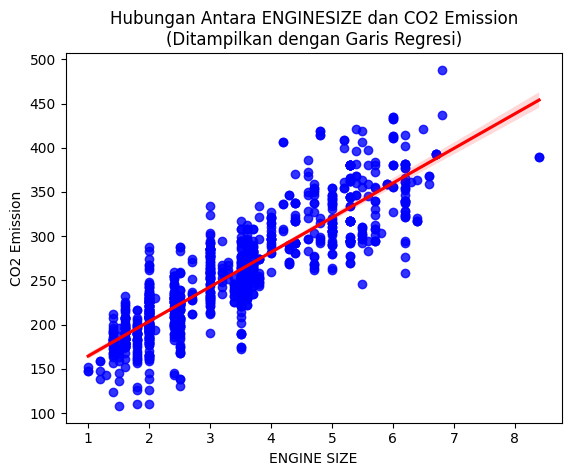

In [427]:

# Scatter plot dengan regresi linier dan warna yang kontras
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, color='blue', line_kws={"color": "red"})
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 Emission')
plt.title('Hubungan Antara ENGINESIZE dan CO2 Emission\n(Ditampilkan dengan Garis Regresi)')
plt.show()


dari hasil visualisasi diatas kami membandingkan fitur engine size dengan CO2 emissions dan bisa dilihat nilai dari engine size cukup mendekati garis regresi.

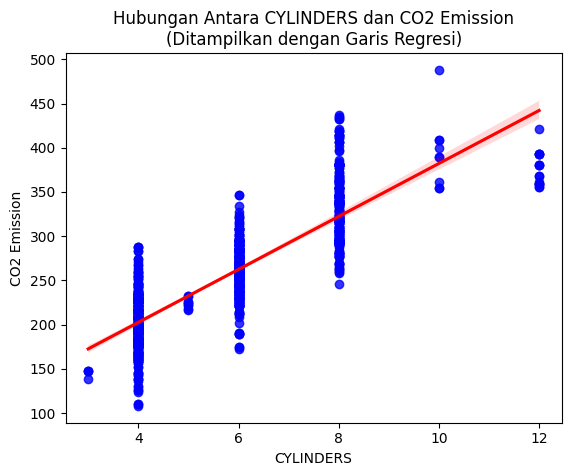

In [428]:

# Scatter plot dengan regresi linier dan warna yang kontras
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=df, color='blue', line_kws={"color": "red"})
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 Emission')
plt.title('Hubungan Antara CYLINDERS dan CO2 Emission\n(Ditampilkan dengan Garis Regresi)')
plt.show()


Dari hasil visualisasi diatas kami membandingkan fitur cylinder dengan CO2 emissions dan bisa dilihat nilai cylinder menjauh dari garis regresi.

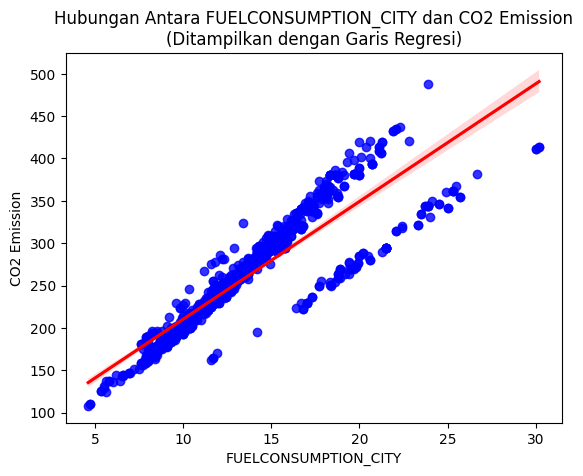

In [429]:

# Scatter plot dengan regresi linier dan warna yang kontras
sns.regplot(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=df, color='blue', line_kws={"color": "red"})
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2 Emission')
plt.title('Hubungan Antara FUELCONSUMPTION_CITY dan CO2 Emission\n(Ditampilkan dengan Garis Regresi)')
plt.show()


Dari hasil visualisasi diatas kami membandingkan fitur fuelconsumption_city dengan CO2 emissions dan bisa dilihat nilai fuelconsumption_city mendekati dari garis regresi.

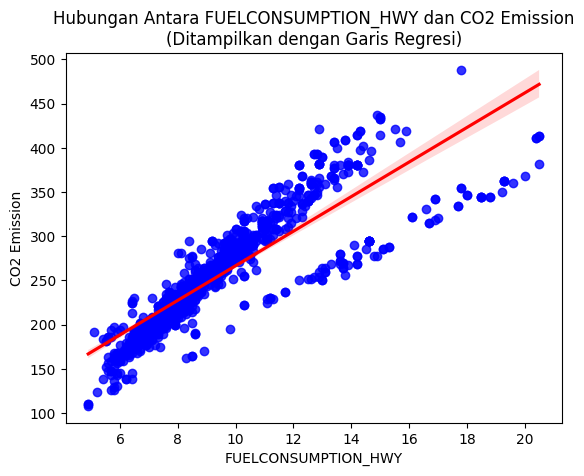

In [430]:

# Scatter plot dengan regresi linier dan warna yang kontras
sns.regplot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=df, color='blue', line_kws={"color": "red"})
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2 Emission')
plt.title('Hubungan Antara FUELCONSUMPTION_HWY dan CO2 Emission\n(Ditampilkan dengan Garis Regresi)')
plt.show()


Dari hasil visualisasi diatas kami membandingkan fitur fuelconsumption_hwy dengan CO2 emissions dan bisa dilihat nilai fuelconsumption_hwy mendekati dari garis regresi, tetapi tidak sedekat dengan fitur fuelconsumption_city.

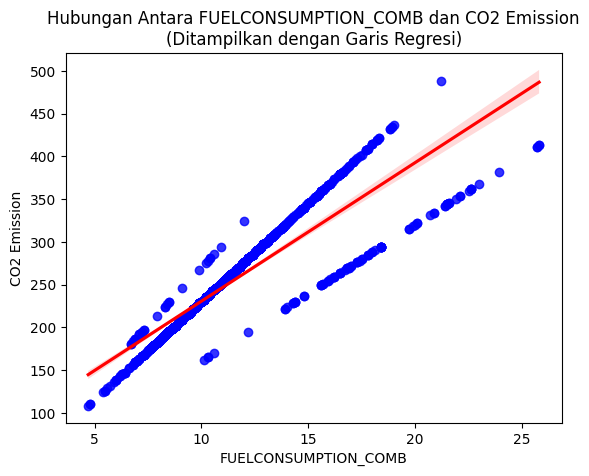

In [431]:

# Scatter plot dengan regresi linier dan warna yang kontras
sns.regplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df, color='blue', line_kws={"color": "red"})
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 Emission')
plt.title('Hubungan Antara FUELCONSUMPTION_COMB dan CO2 Emission\n(Ditampilkan dengan Garis Regresi)')
plt.show()


Dari hasil visualisasi diatas kami membandingkan fitur fuelconsumption_comb dengan CO2 emissions dan bisa dilihat nilai fuelconsumption_comb mendekati dari garis regresi, tetapi terdapat beberapa nilai yang menjauh dari garis.

##**Verify Data Quality**

####Missing Values

In [432]:
df.isnull().sum()

ENGINESIZE                  0
CYLINDERS                   0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Dari hasil codingan diatas dapat dilihat bahwa tidak terdapat nilai yang kosong dari masing-masing kolom pada data tersebut.


####Outliers Values

In [433]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Mengecek outliers untuk setiap kolom numerik
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    outliers = detect_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers dalam kolom '{column}':")
        print(outliers)
    else:
        print(f"Tidak ada outliers dalam kolom '{column}'")

Outliers dalam kolom 'ENGINESIZE':
940    8.4
941    8.4
Name: ENGINESIZE, dtype: float64
Tidak ada outliers dalam kolom 'CYLINDERS'
Outliers dalam kolom 'FUELCONSUMPTION_CITY':
182    25.7
214    23.7
216    23.9
218    25.3
220    23.9
222    25.3
225    30.0
228    30.2
344    24.1
346    24.9
348    25.5
349    23.9
351    26.7
362    24.5
438    23.7
440    23.9
442    25.3
444    23.9
446    25.3
449    30.0
452    30.2
476    25.7
642    25.0
648    24.0
654    25.0
687    24.5
Name: FUELCONSUMPTION_CITY, dtype: float64
Outliers dalam kolom 'FUELCONSUMPTION_HWY':
180    16.1
182    17.8
212    17.7
214    18.8
216    18.5
218    19.3
220    18.5
222    19.3
225    20.4
228    20.5
344    19.2
346    19.6
348    20.0
349    17.8
351    20.5
362    18.0
380    16.7
382    16.7
388    17.0
390    16.9
436    17.7
438    18.8
440    18.5
442    19.3
444    18.5
446    19.3
449    20.4
452    20.5
474    16.1
476    17.8
642    16.9
648    16.6
654    16.9
687    18.0
754    15.9
Nam

Dari hasil output diatas dapat disimpulkan bahwa terdapat outlier pada masing-masing fitur.

####Duplicated Values

In [434]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1062    False
1063    False
1064     True
1065    False
1066    False
Length: 1067, dtype: bool

Dari hasil codingan diatas menunjukkan bahwa terdapat data yang duplicate dari dataset kami.

####Inconsistent Values / Noise (Optional)

In [435]:
for column in df.columns:
  print(f"Kolom '{column}':")

  unique_values_count = len(df[column].unique())

  print(f"Jumlah Nilai Unik: {unique_values_count}")
  print()


Kolom 'ENGINESIZE':
Jumlah Nilai Unik: 45

Kolom 'CYLINDERS':
Jumlah Nilai Unik: 7

Kolom 'FUELTYPE':
Jumlah Nilai Unik: 4

Kolom 'FUELCONSUMPTION_CITY':
Jumlah Nilai Unik: 167

Kolom 'FUELCONSUMPTION_HWY':
Jumlah Nilai Unik: 118

Kolom 'FUELCONSUMPTION_COMB':
Jumlah Nilai Unik: 148

Kolom 'FUELCONSUMPTION_COMB_MPG':
Jumlah Nilai Unik: 43

Kolom 'CO2EMISSIONS':
Jumlah Nilai Unik: 159



Dari hasil codingan diatas dapat disimpulkan terdapat nilai yang unik dari masing-masing fitur dalam dataset kami.

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

In [436]:
print((df.isna().sum() / len(df)) * 100)

ENGINESIZE                  0.0
CYLINDERS                   0.0
FUELTYPE                    0.0
FUELCONSUMPTION_CITY        0.0
FUELCONSUMPTION_HWY         0.0
FUELCONSUMPTION_COMB        0.0
FUELCONSUMPTION_COMB_MPG    0.0
CO2EMISSIONS                0.0
dtype: float64


Dapat dilihat dari codingan diatas bahwa tidak terdapat missing values dalam dataset tersebut

###**Penanganan Duplicated Values**

In [437]:
df[df.duplicated()]

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
13,5.9,12,Z,18.0,12.6,15.6,18,359
16,4.7,8,Z,17.4,11.3,14.7,19,338
17,4.7,8,Z,18.1,12.2,15.4,18,354
18,5.9,12,Z,18.0,12.6,15.6,18,359
22,2.0,4,Z,11.5,8.1,10.0,28,230
...,...,...,...,...,...,...,...,...
1011,3.5,6,X,12.9,9.4,11.3,25,260
1022,2.0,4,Z,10.8,7.6,9.4,30,216
1041,2.0,4,D,7.9,5.6,6.9,41,186
1060,3.0,6,X,13.2,9.5,11.5,25,264


Dari codingan diatas terdapat data yang duplicate sehingga harus dihapus

In [438]:
df = df.drop_duplicates()
df[df.duplicated()]

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


Dapat dilihat dari codingan diatas bahwa tidak terdapat duplicated values dalam dataset tersebut


###**Penanganan Outliers**

###**Pengecekkan Outliers**

In [439]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
ENGINESIZE,0.880503
CYLINDERS,2.012579
FUELCONSUMPTION_CITY,2.767296
FUELCONSUMPTION_HWY,4.150943
FUELCONSUMPTION_COMB,2.767296
FUELCONSUMPTION_COMB_MPG,2.138365
CO2EMISSIONS,1.509434


Codingan diatas berfungsi untuk menilai nilai outlier dalam bentuk persentase pada masing-masing fitur yang ada.

<Axes: ylabel='FUELCONSUMPTION_COMB_MPG'>

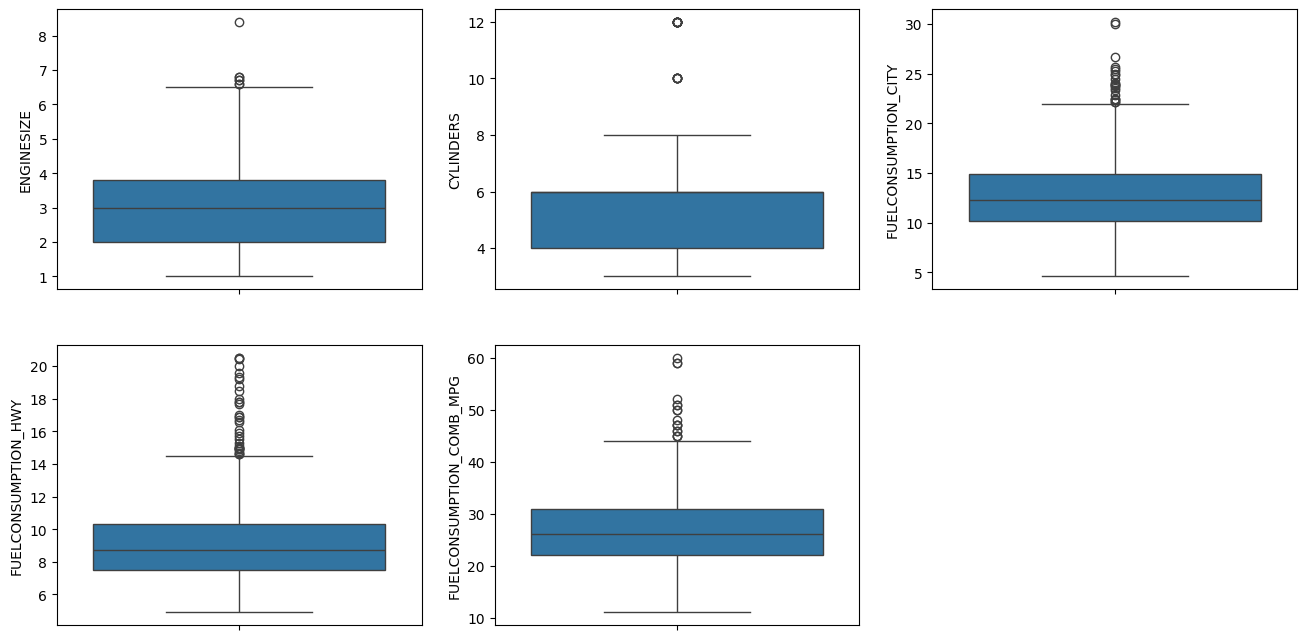

In [440]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['ENGINESIZE'])
plt.subplot(2,3,2)
sns.boxplot(df['CYLINDERS'])
plt.subplot(2,3,3)
sns.boxplot(df['FUELCONSUMPTION_CITY'])
plt.subplot(2,3,4)
sns.boxplot(df['FUELCONSUMPTION_HWY'])
plt.subplot(2,3,5)
sns.boxplot(df['FUELCONSUMPTION_COMB_MPG'])

Codingan diatas untuk menampilkan visualisasi boxplot biar bisa melihat nilai outlier dari masing-masing fitur.

###**Hapus Outliers**

In [441]:
Q1 = df['CYLINDERS'].quantile(0.25)
Q3 = df['CYLINDERS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CYLINDERS'] >= lower_bound) & (df['CYLINDERS'] <= upper_bound)]

Q1 = df['ENGINESIZE'].quantile(0.25)
Q3 = df['ENGINESIZE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ENGINESIZE'] >= lower_bound) & (df['ENGINESIZE'] <= upper_bound)]

Q1 = df['FUELCONSUMPTION_CITY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_CITY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_CITY'] >= lower_bound) & (df['FUELCONSUMPTION_CITY'] <= upper_bound)]


Q1 = df['FUELCONSUMPTION_HWY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_HWY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_HWY'] >= lower_bound) & (df['FUELCONSUMPTION_HWY'] <= upper_bound)]



Q1 = df['FUELCONSUMPTION_COMB'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_COMB'] >= lower_bound) & (df['FUELCONSUMPTION_COMB'] <= upper_bound)]



Q1 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_COMB_MPG'] >= lower_bound) & (df['FUELCONSUMPTION_COMB_MPG'] <= upper_bound)]



Q1 = df['CO2EMISSIONS'].quantile(0.25)
Q3 = df['CO2EMISSIONS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CO2EMISSIONS'] >= lower_bound) & (df['CO2EMISSIONS'] <= upper_bound)]



In [442]:

Q1 = df['CYLINDERS'].quantile(0.25)
Q3 = df['CYLINDERS'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['CYLINDERS'] = np.where(df['CYLINDERS'] > upper_whisker, upper_whisker,
                             np.where(df['CYLINDERS'] < lower_whisker, lower_whisker, df['CYLINDERS']))


Q1 = df['ENGINESIZE'].quantile(0.25)
Q3 = df['ENGINESIZE'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['ENGINESIZE'] = np.where(df['ENGINESIZE'] > upper_whisker, upper_whisker,
                             np.where(df['ENGINESIZE'] < lower_whisker, lower_whisker, df['ENGINESIZE']))


Q1 = df['FUELCONSUMPTION_CITY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_CITY'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['FUELCONSUMPTION_CITY'] = np.where(df['FUELCONSUMPTION_CITY'] > upper_whisker, upper_whisker,
                             np.where(df['FUELCONSUMPTION_CITY'] < lower_whisker, lower_whisker, df['FUELCONSUMPTION_CITY']))

Q1 = df['FUELCONSUMPTION_HWY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_HWY'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['FUELCONSUMPTION_HWY'] = np.where(df['FUELCONSUMPTION_HWY'] > upper_whisker, upper_whisker,
                             np.where(df['FUELCONSUMPTION_HWY'] < lower_whisker, lower_whisker, df['FUELCONSUMPTION_HWY']))


Q1 = df['FUELCONSUMPTION_COMB'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['FUELCONSUMPTION_COMB'] = np.where(df['FUELCONSUMPTION_COMB'] > upper_whisker, upper_whisker,
                             np.where(df['FUELCONSUMPTION_COMB'] < lower_whisker, lower_whisker, df['FUELCONSUMPTION_COMB']))


Q1 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['FUELCONSUMPTION_COMB_MPG'] = np.where(df['FUELCONSUMPTION_COMB_MPG'] > upper_whisker, upper_whisker,
                             np.where(df['FUELCONSUMPTION_COMB_MPG'] < lower_whisker, lower_whisker, df['FUELCONSUMPTION_COMB_MPG']))



Q1 = df['CO2EMISSIONS'].quantile(0.25)
Q3 = df['CO2EMISSIONS'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['CO2EMISSIONS'] = np.where(df['CO2EMISSIONS'] > upper_whisker, upper_whisker,
                             np.where(df['CO2EMISSIONS'] < lower_whisker, lower_whisker, df['CO2EMISSIONS']))



In [443]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
ENGINESIZE,0.0
CYLINDERS,0.0
FUELCONSUMPTION_CITY,0.0
FUELCONSUMPTION_HWY,0.0
FUELCONSUMPTION_COMB,0.0
FUELCONSUMPTION_COMB_MPG,0.0
CO2EMISSIONS,0.0


Dari codingan diatas berfungsi untuk menghapus nilai outlier pada masing-masing fitur untuk mempermudah anlisis prediksi kami.

<Axes: ylabel='FUELCONSUMPTION_COMB_MPG'>

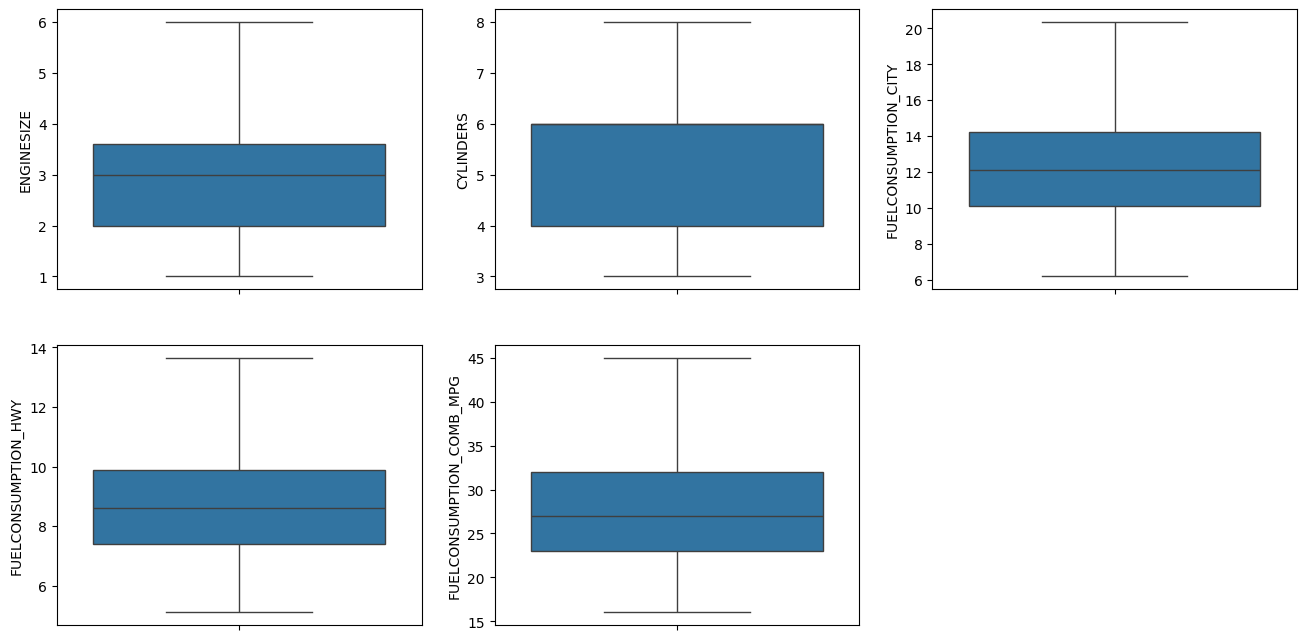

In [444]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['ENGINESIZE'])
plt.subplot(2,3,2)
sns.boxplot(df['CYLINDERS'])
plt.subplot(2,3,3)
sns.boxplot(df['FUELCONSUMPTION_CITY'])
plt.subplot(2,3,4)
sns.boxplot(df['FUELCONSUMPTION_HWY'])
plt.subplot(2,3,5)
sns.boxplot(df['FUELCONSUMPTION_COMB_MPG'])

Dapat dilihat dari visualisasi diatas bahwa nilai outlier dari masing masing fitur telah dihapus

###**Penanganan Inconsistent Values**

Didataset ini pada masing-masing kolom sudah menggunakan tipe data yang sesuai jadi tidak dilakukan penanganan inconsistent values.

##**Construct Data**

In [445]:
new_df = df[['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,Z,9.9,6.7,8.5,196.0
1,2.4,4.0,Z,11.2,7.7,9.6,221.0
3,3.5,6.0,Z,12.7,9.1,11.1,255.0
4,3.5,6.0,Z,12.1,8.7,10.6,244.0
5,3.5,6.0,Z,11.9,7.7,10.0,230.0


Dari dataset diatas terdapat penambahkan fitur yaitu FUELTYPE untuk mempermudah analisis prediksi pada dataset tersebut.

##**Data Transformation**

###**Encoding**

In [446]:
new_df['FUELTYPE']=new_df['FUELTYPE'].replace(['Z','D','E','X'],['0','1','2','3'])
new_df[['FUELTYPE']]=new_df[['FUELTYPE']].apply(pd.to_numeric)

<ipython-input-446-9d9f07ff5f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FUELTYPE']=new_df['FUELTYPE'].replace(['Z','D','E','X'],['0','1','2','3'])
<ipython-input-446-9d9f07ff5f61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['FUELTYPE']]=new_df[['FUELTYPE']].apply(pd.to_numeric)


Codingan diatas berfungsi untuk mengubah nilai dari fitur fueltype yang dari kategorikal menjadi numerical sehingga mempermudah analisis prediksi kami.

###**Pengecekkan Hasil**

In [447]:
new_df

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,0,9.9,6.7,8.5,196.0
1,2.4,4.0,0,11.2,7.7,9.6,221.0
3,3.5,6.0,0,12.7,9.1,11.1,255.0
4,3.5,6.0,0,12.1,8.7,10.6,244.0
5,3.5,6.0,0,11.9,7.7,10.0,230.0
...,...,...,...,...,...,...,...
1061,3.2,6.0,3,13.0,8.9,11.2,258.0
1062,3.0,6.0,3,13.4,9.8,11.8,271.0
1063,3.2,6.0,3,13.2,9.5,11.5,264.0
1065,3.2,6.0,3,12.9,9.3,11.3,260.0


Codingan tersebut dilakukan penggantian nilai-nilai kategorikal dalam kolom 'FUELTYPE' dengan nilai-nilai numerik yang merepresentasikan jenis bahan bakar. Proses ini disebut encoding

In [448]:
new_df.to_csv('Data Cleaned.csv', index=False)

##**Modelling Predict**

###***select modeling techniques***

Disini mengggunakan Algoritma linear regression dann ridge regression pada dataset ini karena memungkinkan untuk memodelkan hubungan antara variabel independen seperti enginesize,cylinder,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb dengan variabel dependen, yaitu CO2Emission. Dengan menggunakan algoritma ini, dapat memprediksi nilai CO2 Emission dari kendaraan berdasarkan nilai-nilai variabel independen yang diberikan. Hal ini sangat berguna dalam analisis data karena memungkinkan kita untuk memahami dan memprediksi nilai CO2 Emission..


##**Pre-processing**

#####**Split Data**

In [449]:
import numpy as np

def split_data(x, y, test_ratio=0.2, random_state=None):
    """Membagi data menjadi data pelatihan dan data pengujian."""
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(x))
    test_size = int(len(x) * test_ratio)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return x_train, x_test, y_train, y_test

# Misalnya, Anda memiliki DataFrame df dan ingin menggunakan fitur-fitur berikut:
features = ['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
x = new_df[features]
y = new_df['CO2EMISSIONS']

# Membagi data menjadi data pelatihan dan data pengujian
# Membagi data menjadi data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = split_data(new_df[features].values, new_df['CO2EMISSIONS'].values, test_ratio=0.2, random_state=42)

# Sekarang Anda memiliki x_train, x_test, y_train, dan y_test yang siap digunakan untuk pelatihan model.


codingan diatas menggunakan fungsi split data untuk membagi data menjadi data pelatihan dan data pengujian.



In [450]:
x

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4.0,0,9.9,6.7,8.5
1,2.4,4.0,0,11.2,7.7,9.6
3,3.5,6.0,0,12.7,9.1,11.1
4,3.5,6.0,0,12.1,8.7,10.6
5,3.5,6.0,0,11.9,7.7,10.0
...,...,...,...,...,...,...
1061,3.2,6.0,3,13.0,8.9,11.2
1062,3.0,6.0,3,13.4,9.8,11.8
1063,3.2,6.0,3,13.2,9.5,11.5
1065,3.2,6.0,3,12.9,9.3,11.3


In [451]:
y

0       196.0
1       221.0
3       255.0
4       244.0
5       230.0
        ...  
1061    258.0
1062    271.0
1063    264.0
1065    260.0
1066    294.0
Name: CO2EMISSIONS, Length: 719, dtype: float64

In [452]:
x_train

array([[ 3.6,  6. ,  3. , 14.8, 10.4, 12.8],
       [ 1.8,  4. ,  3. ,  9.8,  7.3,  8.7],
       [ 3. ,  6. ,  0. , 12.5,  8.6, 10.7],
       ...,
       [ 3.5,  6. ,  3. , 11. ,  6.8,  9.1],
       [ 1.5,  4. ,  3. ,  8. ,  6.7,  7.4],
       [ 3. ,  6. ,  3. , 12.8,  9.1, 11.1]])

In [453]:
y_train

array([294., 200., 246., 308., 232., 269., 242., 260., 251., 186., 196.,
       198., 271., 264., 230., 179., 212., 310., 267., 232., 278., 197.,
       224., 288., 175., 224., 304., 212., 340., 267., 304., 235., 262.,
       269., 225., 179., 189., 286., 221., 253., 304., 253., 262., 235.,
       294., 260., 276., 285., 209., 242., 334., 297., 212., 189., 159.,
       290., 246., 340., 294., 264., 214., 258., 347., 232., 267., 235.,
       271., 320., 315., 285., 285., 251., 271., 246., 320., 237., 278.,
       294., 260., 212., 253., 338., 175., 315., 198., 297., 237., 198.,
       186., 175., 186., 363., 359., 189., 294., 324., 223., 196., 294.,
       256., 264., 230., 214., 255., 186., 294., 205., 264., 196., 306.,
       177., 267., 184., 200., 294., 239., 216., 225., 216., 288., 308.,
       267., 184., 216., 168., 264., 352., 260., 265., 172., 205., 168.,
       276., 248., 182., 283., 216., 209., 320., 175., 250., 221., 205.,
       221., 207., 258., 276., 264., 198., 165., 19

###**Build and Train Model**

#####**Linear Regression**

In [467]:
import pickle
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.x_mean = None
        self.x_std = None

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape

        # Normalisasi data
        self.x_mean = np.mean(x_train, axis=0)
        self.x_std = np.std(x_train, axis=0)
        x_train_normalized = (x_train - self.x_mean) / self.x_std

        # Inisialisasi bobot dan bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Prediksi nilai target
            y_pred = np.dot(x_train_normalized, self.weights) + self.bias

            # Menghitung gradien
            dw = (1 / n_samples) * np.dot(x_train_normalized.T, (y_pred - y_train))
            db = (1 / n_samples) * np.sum(y_pred - y_train)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Regularisasi (jika diperlukan)
            if self.regularization == 'l2':
                self.weights -= self.learning_rate * 2 * self.lambda_ * self.weights

    def predict(self, x_test):
        if self.weights is None or self.bias is None:
            raise ValueError("Model has not been trained yet. Please train the model using the fit method.")
        # Pastikan melakukan normalisasi yang sama dengan data pelatihan
        x_test_normalized = (x_test - self.x_mean) / self.x_std
        return np.dot(x_test_normalized, self.weights) + self.bias

# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model menggunakan data pelatihan
model.fit(x_train, y_train)

# Memprediksi nilai target untuk data pelatihan
y_pred = model.predict(x_test)
print(y_pred)

# Simpan model ke dalam file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Muat model dari file
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Prediksi menggunakan model yang dimuat
predictions = loaded_model.predict(x_test)
print(predictions)


[189.60737756 301.03734839 292.52327825 202.43240846 195.82250238
 198.54746486 222.50067104 193.85888964 204.36897281 321.60239999
 291.12354767 247.47466602 256.16519493 219.04662054 219.3530433
 312.92725445 182.65794694 228.0967515  260.81152748 270.21198339
 238.15136547 347.76472391 216.10258524 292.89980556 224.55086612
 346.5488351  226.86762922 207.24247871 231.21551994 305.73308642
 186.95834246 182.13249055 284.70682597 243.4201448  258.48721056
 304.0935801  193.04279216 177.83166791 201.33377665 300.16792308
 214.45605023 172.27811178 199.99762077 203.39738985 281.19324151
 207.19135724 305.47578956 219.42280066 265.13939851 235.79027977
 255.6093108  254.03888782 191.84778171 241.78340607 234.45412389
 220.10960682 309.95254449 221.14072374 255.1700052  262.62625631
 245.78397598 168.95068301 202.42399597 299.19418737 186.59401201
 185.22178348 285.92570777 239.19941938 340.69846784 252.75505256
 173.504224   213.15854994 181.04002876 302.3854533  256.07225792
 240.864063

codingan diatas berfungsi untuk membuat model linear regression tanpa menggunakan library sklearn.

In [455]:
y_pred=model.predict(x_test)

#####**Ridge Regression**

In [456]:
import numpy as np

class RidgeRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.x_mean = None
        self.x_std = None

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape

        # Normalisasi data
        self.x_mean = np.mean(x_train, axis=0)
        self.x_std = np.std(x_train, axis=0)
        x_train_normalized = (x_train - self.x_mean) / self.x_std

        # Inisialisasi bobot dan bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Prediksi nilai target
            y_pred = np.dot(x_train_normalized, self.weights) + self.bias

            # Menghitung gradien
            dw = (1 / n_samples) * np.dot(x_train_normalized.T, (y_pred - y_train))
            db = (1 / n_samples) * np.sum(y_pred - y_train)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Regularisasi (Regresi Ridge)
            self.weights -= 2 * self.learning_rate * self.lambda_ * self.weights

    def predict(self, x_test):
        # Pastikan melakukan normalisasi yang sama dengan data pelatihan
        x_test_normalized = (x_test - self.x_mean) / self.x_std
        return np.dot(x_test_normalized, self.weights) + self.bias

# Membuat objek model Regresi Ridge
ridge_model = RidgeRegression()

# Melatih model menggunakan data pelatihan
ridge_model.fit(x_train, y_train)

# Memprediksi nilai target untuk data pelatihan
y_pred1 = ridge_model.predict(x_test)
print(y_pred1)


[190.08087422 299.167921   290.88851539 203.12747368 195.61945195
 199.37320474 222.09511671 194.37831412 203.80723818 320.58457268
 289.78495596 247.40092151 255.63846965 218.84263827 218.94698691
 310.4521195  184.06475667 228.17045994 259.51167601 268.8158953
 237.80580901 345.48849039 215.94434132 291.32188701 224.0976988
 344.18155222 226.42534776 207.4712311  230.57354104 303.69349425
 187.03242726 182.42218633 283.19870657 243.41109049 258.02495704
 303.77533302 192.89787865 178.23425018 202.03700201 299.27495299
 214.86369056 173.0886934  200.384998   203.49624394 279.7461572
 207.39705949 304.46115603 219.45663252 264.26098549 235.22712823
 255.26895499 253.91209589 191.95665359 241.41974886 233.57512423
 220.22735145 308.09880031 220.73841661 254.64126516 261.86447904
 245.69899658 169.39542684 203.00157435 297.29033483 187.89319721
 185.31516917 285.2455159  238.71927165 339.00247009 252.27918746
 174.70520626 213.04604437 181.52737488 301.58285806 255.66287934
 239.72696202

codingan diatas berfungsi untuk membuat model ridge regression tanpa menggunakan library sklearn.

In [457]:
y_pred1=ridge_model.predict(x_test)

In [458]:
import pandas as pd

# Reset DataFrame
x_test_reset = pd.DataFrame(new_df[features]).reset_index(drop=True)
y_test_reset = pd.DataFrame(new_df['CO2EMISSIONS']).reset_index(drop=True)

# Buat model regresi linear
model = LinearRegression()
model.fit(x_train, y_train)

# Buat model regresi Ridge
ridge_model = RidgeRegression()
ridge_model.fit(x_train, y_train)

# Prediksi nilai target untuk data pengujian
y_pred = model.predict(x_test_reset)
y_pred_ridge = ridge_model.predict(x_test_reset)

# Gabungkan hasil prediksi dengan data asli
combined_data = pd.concat([x_test_reset, y_test_reset, pd.DataFrame({'Linear_Prediction': y_pred}), pd.DataFrame({'Ridge_Prediction': y_pred_ridge})], axis=1)

# Hapus baris yang mengandung nilai NaN
combined_data_cleaned = combined_data.dropna()


codingan berikut digunakan untuk mengorganisir data uji (x_test dan y_test) bersama dengan hasil prediksi dari dua model regressor ke dalam satu DataFrame untuk memudahkan analisis lebih lanjut atau pembandingan antara nilai aktual dan nilai prediksi.

In [459]:
combined_data_cleaned

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,Linear_Prediction,Ridge_Prediction
0,2.0,4.0,0,9.9,6.7,8.5,196.0,198.667352,198.884206
1,2.4,4.0,0,11.2,7.7,9.6,221.0,218.123904,218.171245
2,3.5,6.0,0,12.7,9.1,11.1,255.0,256.268141,256.248861
3,3.5,6.0,0,12.1,8.7,10.6,244.0,249.165942,249.202370
4,3.5,6.0,0,11.9,7.7,10.0,230.0,239.111665,239.262897
...,...,...,...,...,...,...,...,...,...
714,3.2,6.0,3,13.0,8.9,11.2,258.0,251.014728,251.039469
715,3.0,6.0,3,13.4,9.8,11.8,271.0,259.575165,259.511676
716,3.2,6.0,3,13.2,9.5,11.5,264.0,257.056193,257.013521
717,3.2,6.0,3,12.9,9.3,11.3,260.0,253.737605,253.721300


# **EVALUATION**


## **Evaluate Results**

### Regresi

In [460]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung metrik evaluasi
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Memuat data
data_url = "/content/Data Cleaned.csv"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Split data menjadi data latih dan data uji
# Di sini Anda perlu mengganti x dan y dengan fitur dan target yang sesuai
x_train, x_test, y_train, y_test = split_data(new_df[features].values, new_df['CO2EMISSIONS'].values, test_ratio=0.2, random_state=42)

# Inisialisasi dan latih model Regresi Linear
model = LinearRegression()
model.fit(x_train, y_train)

# Prediksi nilai target menggunakan model Regresi Linear
y_pred = model.predict(x_test)

# Hitung metrik evaluasi untuk model Regresi Linear
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred)

# Inisialisasi dan latih model Regresi Ridge
ridge_model = RidgeRegression()
ridge_model.fit(x_train, y_train)

# Prediksi nilai target menggunakan model Regresi Ridge
y_pred_ridge = ridge_model.predict(x_test)

# Hitung metrik evaluasi untuk model Regresi Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

# Menyimpan metrik evaluasi ke dalam DataFrame
df_eval = pd.DataFrame({'': ['Linear Regression', 'Ridge Regression'],
                        'MAE': [mae_linear, mae_ridge],
                        'MSE': [mse_linear, mse_ridge],
                        'RMSE': [rmse_linear, rmse_ridge],
                        'MAPE': [mape_linear, mape_ridge]})

df_eval = df_eval.set_index('')

# Menampilkan hasil evaluasi
display(df_eval)


,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,11.495491,305.544070,17.479819,4.674228
Ridge Regression,11.585048,306.890429,17.518288,4.711283


Dari hasil evaluasi yang diberikan, baik model Regresi Linear maupun model Regresi Ridge memiliki performa yang cukup serupa. Oleh karena itu, dalam kasus ini, kami mungkin dapat memilih model yang paling sederhana atau yang paling mudah diinterpretasikan, yang dalam kasus ini mungkin menjadi model Regresi Linear.

###**Cross Validation**

In [461]:
# Fungsi untuk melakukan cross-validation
def cross_val_score(model, x, y, cv, scoring='r2'):
    # Tentukan jumlah data yang akan digunakan pada setiap lipatan
    fold_size = len(x) // cv

    # Inisialisasi daftar untuk menyimpan skor pada setiap lipatan
    scores = []

    # Loop melalui setiap lipatan
    for i in range(cv):
        # Bagi data menjadi data latih dan data uji berdasarkan lipatan
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(x))) - set(test_indices))
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        # Latih model pada data latih
        model.fit(x_train, y_train)

        # Hitung prediksi pada data uji
        y_pred = model.predict(x_test)

        # Hitung skor berdasarkan metrik evaluasi yang dipilih
        if scoring == 'r2':
            ss_res = np.sum((y_test - y_pred) ** 2)
            ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
            score = 1 - (ss_res / ss_tot)
        else:
            raise ValueError("Scoring method not supported.")

        # Simpan skor pada daftar skor
        scores.append(score)

    return scores

# Pastikan x dan y telah diinisialisasi dengan data yang sesuai
# Misalnya, x adalah DataFrame fitur-fitur dan y adalah DataFrame target 'CO2EMISSIONS'
x = new_df[features].values
y = new_df['CO2EMISSIONS'].values

# Inisialisasi model regresi linear
model = LinearRegression()

# Tentukan jumlah lipatan untuk cross-validation (cv)
k = 5

# Lakukan cross-validation dan hitung skor
cv_result = cross_val_score(model, x, y, cv=k, scoring='r2')  # menggunakan R^2 sebagai skor
print('CV Scores: ', cv_result)
print('CV scores average: ', np.mean(cv_result))


CV Scores:  [0.82950807978508, 0.7053787095024522, 0.8864663577546025, 0.9162321569451137, 0.9108564252246631]
CV scores average:  0.8496883458423824


Rata-rata dari nilai-nilai R^2 di atas adalah sekitar 0.8497. Ini menunjukkan bahwa model regresi linear secara umum mampu menjelaskan sekitar 84.97% dari variasi dalam data pengujian. Semakin tinggi nilai R^2, semakin baik model dapat menjelaskan variasi dalam data, dan hasil cross-validation menunjukkan bahwa model regresi linear memiliki kinerja yang baik dalam memprediksi nilai target CO2EMISSIONS berdasarkan fitur-fitur yang diberikan.







In [462]:
import numpy as np

# Fungsi untuk melakukan cross-validation
def cross_val_score(ridge_model, x, y, cv, scoring='r2'):
    # Tentukan jumlah data yang akan digunakan pada setiap lipatan
    fold_size = len(x) // cv

    # Inisialisasi daftar untuk menyimpan skor pada setiap lipatan
    scores = []

    # Loop melalui setiap lipatan
    for i in range(cv):
        # Bagi data menjadi data latih dan data uji berdasarkan lipatan
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(x))) - set(test_indices))
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        # Latih model pada data latih
        ridge_model.fit(x_train, y_train)

        # Hitung prediksi pada data uji
        y_pred = ridge_model.predict(x_test)

        # Hitung skor berdasarkan metrik evaluasi yang dipilih
        if scoring == 'r2':
            ss_res = np.sum((y_test - y_pred) ** 2)
            ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
            score = 1 - (ss_res / ss_tot)
        else:
            raise ValueError("Scoring method not supported.")

        # Simpan skor pada daftar skor
        scores.append(score)

    return scores

# Pastikan x dan y telah diinisialisasi dengan data yang sesuai
# Misalnya, x adalah DataFrame fitur-fitur dan y adalah DataFrame target 'CO2EMISSIONS'
x = new_df[features].values
y = new_df['CO2EMISSIONS'].values

# Inisialisasi model regresi Ridge
ridge_model = RidgeRegression()

# Tentukan jumlah lipatan untuk cross-validation (cv)
k = 5

# Lakukan cross-validation dan hitung skor
cv_result = cross_val_score(ridge_model, x, y, cv=k, scoring='r2')  # menggunakan R^2 sebagai skor
print('CV Scores: ', cv_result)
print('CV scores average: ', np.mean(cv_result))


CV Scores:  [0.8306714604756009, 0.7102383965796568, 0.8862043163351878, 0.9153361429611764, 0.910358430112552]
CV scores average:  0.8505617492928348


Rata-rata dari nilai-nilai R^2 di atas adalah sekitar 0.8506. Ini menunjukkan bahwa model regresi Ridge secara umum mampu menjelaskan sekitar 85.06% dari variasi dalam data pengujian. Semakin tinggi nilai R^2, semakin baik model dapat menjelaskan variasi dalam data, dan hasil cross-validation menunjukkan bahwa model regresi Ridge memiliki kinerja yang baik dalam memprediksi nilai target CO2EMISSIONS berdasarkan fitur-fitur yang diberikan.

###**Feature Selection**

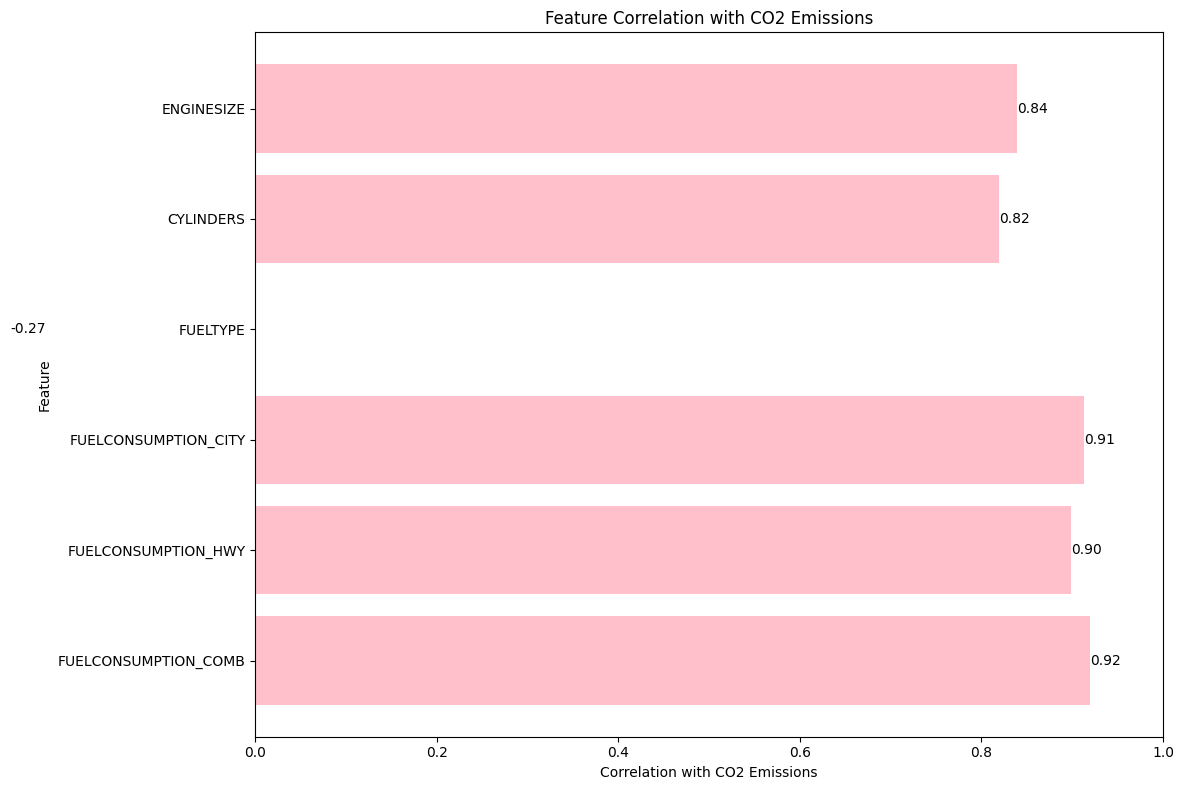

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ganti ini dengan data Anda
x = new_df[features]  # Ambil hanya fitur yang ingin ditampilkan
y = new_df['CO2EMISSIONS']  # Ganti 'CO2EMISSIONS' dengan nama kolom target Anda

# Menghitung korelasi antara fitur-fitur numerik dan target
correlation_matrix = x.corrwith(y)

# Visualisasi
plt.figure(figsize=(12, 8))  # Ukuran figur yang lebih besar
bars = plt.barh(correlation_matrix.index, correlation_matrix, color='pink')

# Menambahkan nilai korelasi pada setiap batang
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')

plt.xlabel('Correlation with CO2 Emissions')
plt.ylabel('Feature')
plt.title('Feature Correlation with CO2 Emissions')
plt.gca().invert_yaxis()

# Set minimum value for x-axis
plt.xlim(0, 1)

plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


Dari hasil visualisasi diatas dapat dilihat fitur-fitur yang paling mempengaruhi nilai CO2 Emissions. Dan dapat disimpulkan fitur fuelconsumption_comb paling tinggi nilainya. untuk fitur fueltype tidak muncul di barchart dikarenakan nilainya terlalu rendah (negatif)

In [464]:
import numpy as np

# Contoh data
x_train = new_df[features].values  # Sesuaikan dengan fitur yang Anda miliki
y_train = new_df['CO2EMISSIONS'].values  # Sesuaikan dengan target yang Anda miliki

# Fungsi untuk menghitung mean squared error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Fungsi untuk melatih model linear regression dengan hyperparameter tertentu
def model (x_train, y_train):
    # Hitung parameter theta menggunakan rumus normal equation
    theta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
    return theta

# Fungsi untuk melakukan prediksi dengan model linear regression
def predict(x_test, theta):
    return np.dot(x_test, theta)

# Fungsi untuk melakukan normalisasi data
def normalize_data(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) / std, mean, std

# Fungsi untuk melakukan validasi silang dan menghitung MSE rata-rata
def cross_validation(x_train, y_train, fit_intercept, normalize):
    num_samples = len(x_train)
    num_folds = 5  # Jumlah lipatan untuk validasi silang
    fold_size = num_samples // num_folds
    mse_sum = 0
    for i in range(num_folds):
        # Bagi data menjadi set pelatihan dan validasi
        val_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = [idx for idx in range(num_samples) if idx not in val_indices]
        x_val, y_val = x_train[val_indices], y_train[val_indices]
        x_tr, y_tr = x_train[train_indices], y_train[train_indices]
        # Normalisasi data jika normalize=True
        if normalize:
            x_tr, mean, std = normalize_data(x_tr)
            x_val = (x_val - mean) / std
        # Tambahkan kolom satu untuk intercept jika fit_intercept=True
        if fit_intercept:
            x_tr = np.column_stack((np.ones(len(x_tr)), x_tr))
            x_val = np.column_stack((np.ones(len(x_val)), x_val))
        # Latih model pada set pelatihan
        theta = model (x_tr, y_tr)
        # Prediksi pada set validasi
        y_pred = predict(x_val, theta)
        # Hitung MSE pada set validasi
        mse = mean_squared_error(y_val, y_pred)
        mse_sum += mse
    return mse_sum / num_folds

# Melakukan tuning hyperparameter secara manual
best_fit_intercept = None
best_normalize = None
best_mse = float('inf')

# Uji berbagai kombinasi hyperparameter
for fit_intercept in [True, False]:
    for normalize in [True, False]:
        mse = cross_validation(x_train, y_train, fit_intercept, normalize)
        # Perbarui hyperparameter terbaik jika MSE lebih rendah
        if mse < best_mse:
            best_mse = mse
            best_fit_intercept = fit_intercept
            best_normalize = normalize

# Cetak hasil tuning hyperparameter
print("Best Hyperparameters:")
print("Fit Intercept:", best_fit_intercept)
print("Normalize:", best_normalize)
print("Average MSE:", best_mse)


Best Hyperparameters:
Fit Intercept: True
Normalize: True
Average MSE: 383.48050417071306


dari hasil tunning hyerparameter yang dilakukan menghasilkan hasil yang kurang baik karena nilai mse dari model linear regression jadi semakin naik dibandingkan hasil sebelum di tunning

##**Determine Next Steps**



 Dan dapat disimpulkan dari langkah-langkah penting telah dilakukan. Pertama, data diproses dan dipisahkan menjadi fitur dan target, lalu dibagi menjadi data pelatihan dan data uji. Berbagai model regresi, termasuk Linear Regression dan ridgre regression, diterapkan dan dievaluasi menggunakan metrik evaluasi yang relevan. Fitur-fitur yang paling penting diidentifikasi menggunakan metode seleksi fitur. Evaluasi akhir dilakukan untuk membandingkan kinerja model sebelum dan setelah tuning. Dan hasil dari analisis langkah-langkah yang telah dilakukan dalam tahap evaluasi hingga tunning hyperparameter, kami memutuskan untuk menggunakan model linear regression karena model ini lebih sering dipelajari dan dimengerti. Sehingga model yang sekarang digunakan dapat lanjut ke tahap berikutnya.